Model Accuracy: 98.85%

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       848
           1       0.99      0.98      0.98       367

    accuracy                           0.99      1215
   macro avg       0.99      0.98      0.99      1215
weighted avg       0.99      0.99      0.99      1215



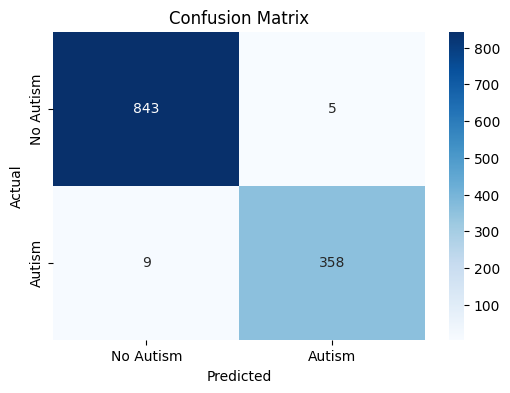

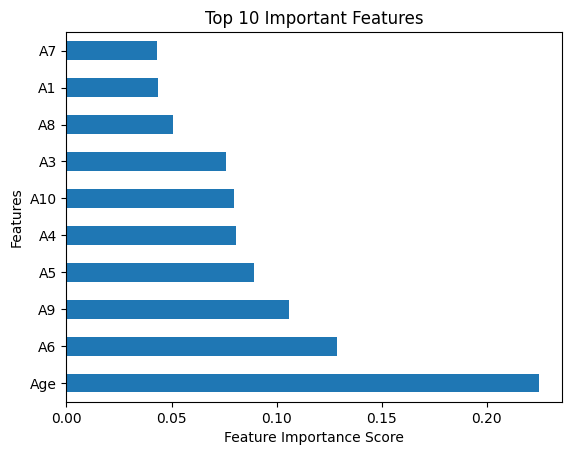

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "Autism_Screening_Data_Combined.csv"
df = pd.read_csv(file_path)

# Encode categorical variables
label_encoders = {}
categorical_cols = ["Sex", "Jauundice", "Family_ASD", "Class"]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split data into features and target
X = df.drop(columns=["Class"])  # Features
y = df["Class"]  # Target variable

# Normalize numerical features (Age)
scaler = StandardScaler()
X["Age"] = scaler.fit_transform(X[["Age"]])

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_rep)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No Autism", "Autism"], yticklabels=["No Autism", "Autism"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Feature importance plot
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features")
plt.show()
